<a href="https://colab.research.google.com/github/subashkatwal/PRODIGY_DS_04/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load validation and training datasets

In [17]:
data_val= pd.read_csv('twitter_validation.csv', header=None)
data_training = pd.read_csv('twitter_training.csv',header= None)

# Split the validation data into new validation and test sets

In [18]:
from sklearn.model_selection import train_test_split
new_validation_data , test_data= train_test_split(data_val,test_size = 0.2, random_state= 42)

# Print the sizes of new validation and test datasets

In [19]:
print('New validation data :',len(new_validation_data))
print( 'New test data : ',len(test_data))


New validation data : 800
New test data :  200


In [20]:
data_val.head()


,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [21]:
new_validation_data.head()

,0,1,2,3
29,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...
535,5311,Hearthstone,Neutral,The next major #Hearthstone update pays tribut...
695,6472,Fortnite,Irrelevant,@Formula yo Alix or formula I am a big fan and...
557,5865,HomeDepot,Negative,@HomeDepot \nThis has been the WORST experienc...
836,10054,PlayerUnknownsBattlegrounds(PUBG),Negative,India Bans 118 Chinese apps including PUBG #PU...


# Rename columns for better readability

In [25]:
new_validation_data.columns= ['ID','Platform','Sentiment','Text']
new_validation_data.head()

,ID,Platform,Sentiment,Text
29,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...
535,5311,Hearthstone,Neutral,The next major #Hearthstone update pays tribut...
695,6472,Fortnite,Irrelevant,@Formula yo Alix or formula I am a big fan and...
557,5865,HomeDepot,Negative,@HomeDepot \nThis has been the WORST experienc...
836,10054,PlayerUnknownsBattlegrounds(PUBG),Negative,India Bans 118 Chinese apps including PUBG #PU...


# Define a function to clean the text data

In [39]:

test_data.columns= ['ID','Platform','Sentiment','Text']


In [40]:
import re

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, numbers, mentions, and hashtags.
    Converts text to lowercase for uniformity.

    Args:
    text (str): The text to be cleaned.

    Returns:
    str: The cleaned text.
    """
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase

    return text


In [41]:
new_validation_data['Text']=new_validation_data['Text'].apply(clean_text)
test_data['Text']=test_data['Text'].apply(clean_text)

# Visualize sentiment distribution

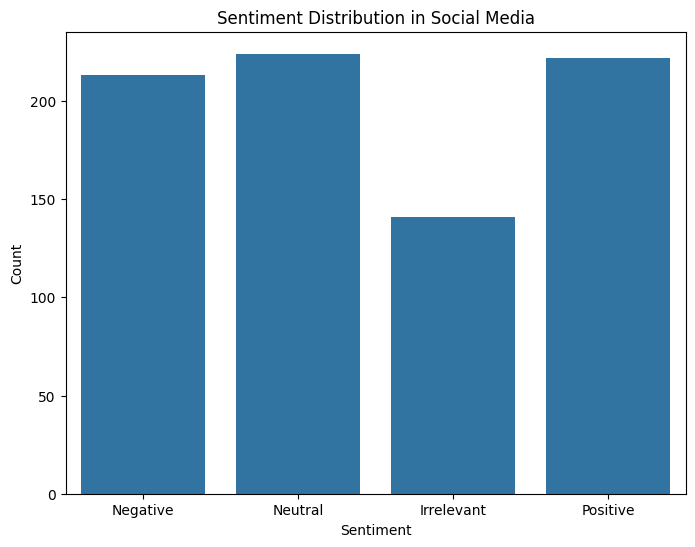

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data = new_validation_data, x= 'Sentiment')
plt.title("Sentiment Distribution in Social Media")
plt.xlabel("Sentiment")
plt.ylabel('Count')
plt.show()

# Visualize sentiment distribution across platforms

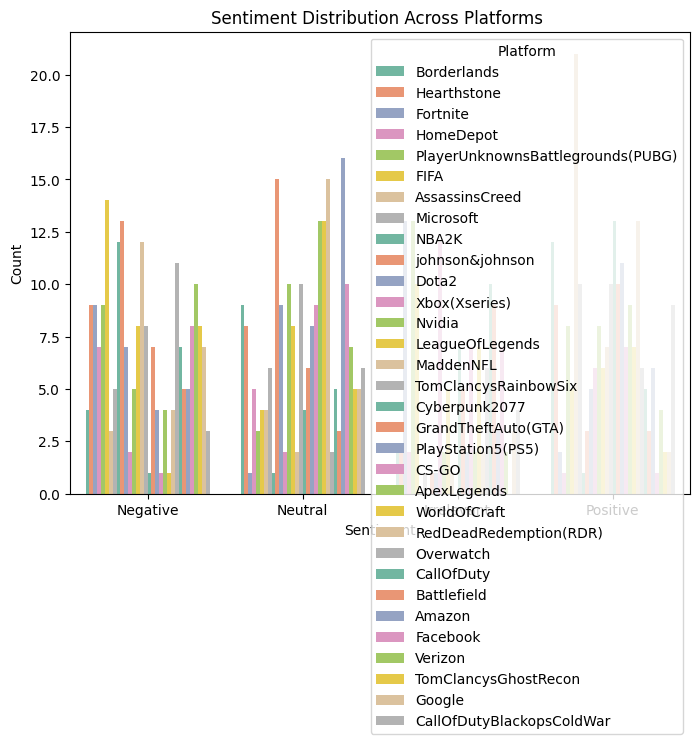

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(data= new_validation_data , x= 'Sentiment', hue='Platform',palette='Set2')
plt.title('Sentiment Distribution Across Platforms ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Install and import WordCloud for generating word clouds

In [48]:
! pip install wordcloud

In [50]:
from wordcloud import WordCloud

In [51]:
def generate_word_clouds(sentiment):

    """
    Generates a word cloud for the given sentiment category.
    Combines text data for the sentiment and displays a word cloud.
    """
    text = ''.join(new_validation_data[new_validation_data['Sentiment']== sentiment]['Text'])
    wordcloud = WordCloud(width= 800 , height = 500 , background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment}')
    plt.show()

# Generate word clouds for Positive, Neutral, and Negative sentiments

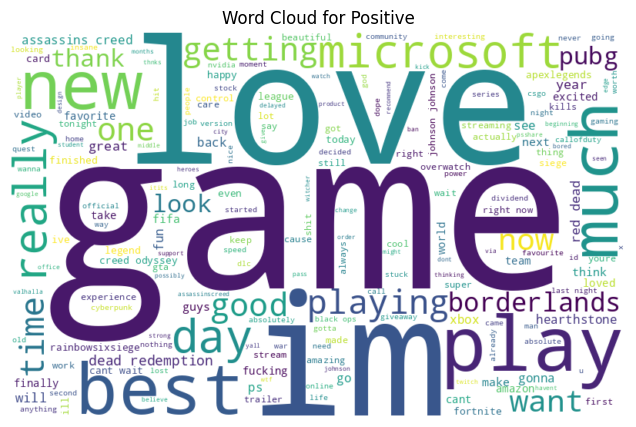

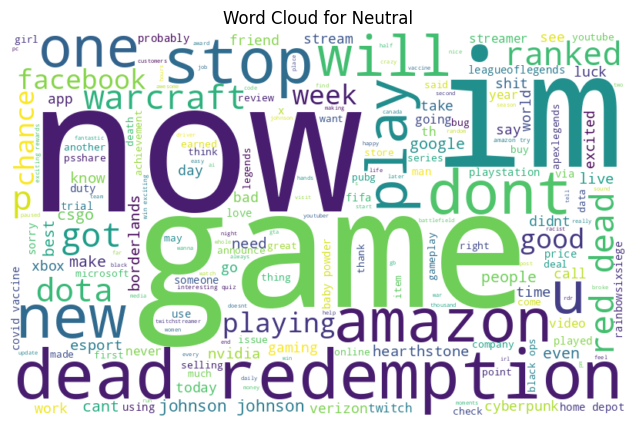

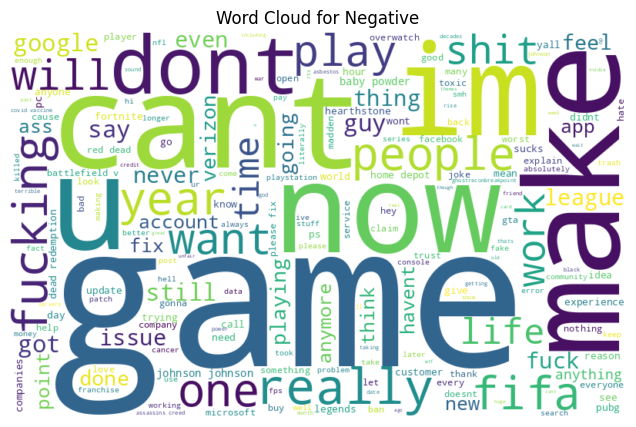

In [56]:
generate_word_clouds('Positive')
generate_word_clouds('Neutral')
generate_word_clouds('Negative')


# Add a new column for text length

In [58]:
new_validation_data['Text_Length']= new_validation_data['Text'].apply(len)

# Visualize the distribution of text lengths by sentiment

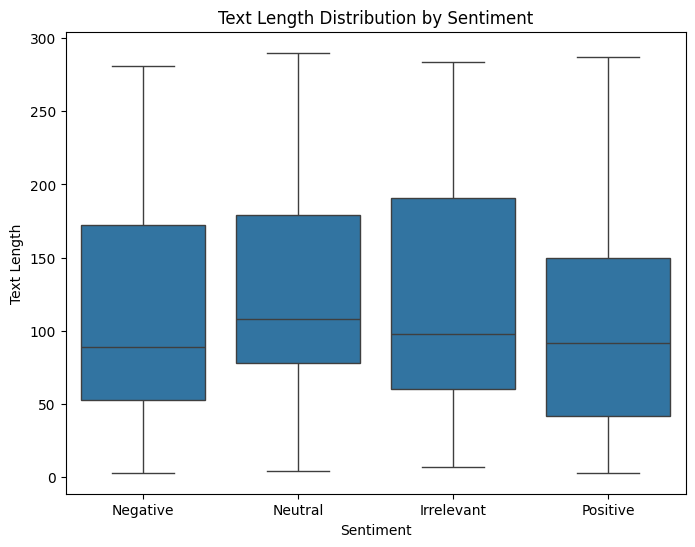

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(data= new_validation_data, x= 'Sentiment', y= 'Text_Length')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

# Plot sentiment counts in a bar chart

Sentiment
Neutral       224
Positive      222
Negative      213
Irrelevant    141
Name: count, dtype: int64


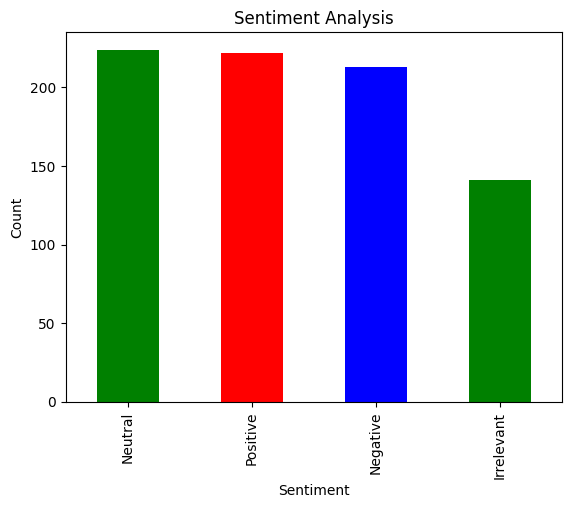

In [64]:
sentiment_counts = new_validation_data['Sentiment'].value_counts()
print(sentiment_counts)

sentiment_counts.plot(kind= 'bar', title = 'Sentiment Analysis' , color= ['green','red','blue'])
plt.ylabel("Count")
plt.show()


#Topic or Platform-Specific Sentiment Analysis

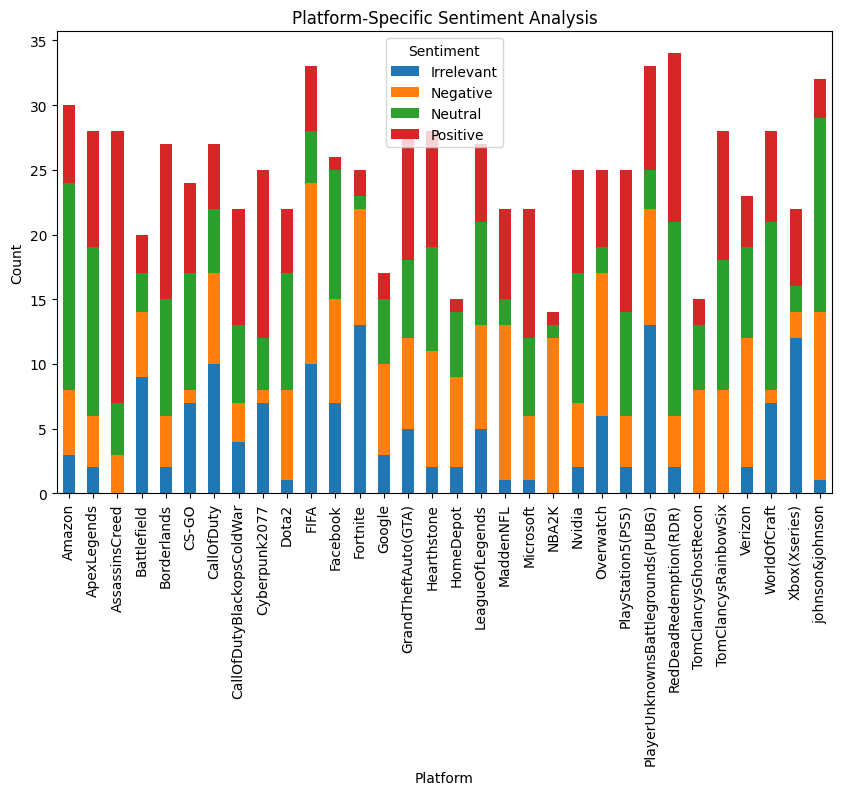

In [68]:
platform_sentiment= new_validation_data.groupby(['Platform','Sentiment']).size().unstack()
platform_sentiment.plot(kind='bar', stacked= True, figsize= (10,6))
plt.title('Platform-Specific Sentiment Analysis')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# Boxplot for text length distribution grouped by sentiment

<function matplotlib.pyplot.show(close=None, block=None)>

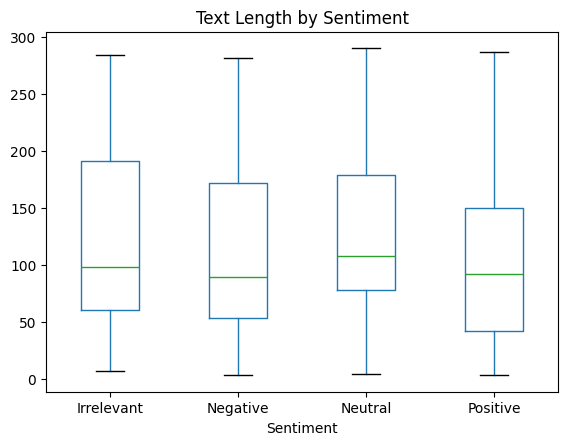

In [69]:
new_validation_data['Text_Length'] = new_validation_data['Text'].apply(len)
new_validation_data.boxplot(column='Text_Length', by='Sentiment', grid=False)
plt.title('Text Length by Sentiment')
plt.suptitle('') # remove the default subtitle
plt.show